In [9]:
# Imports
import matplotlib.pyplot as plt
from pyod.utils.data import generate_data
from pyod.models.knn import KNN
from sklearn.metrics import (
    confusion_matrix,
    balanced_accuracy_score,
    roc_curve,
    auc
)

# Ex 1

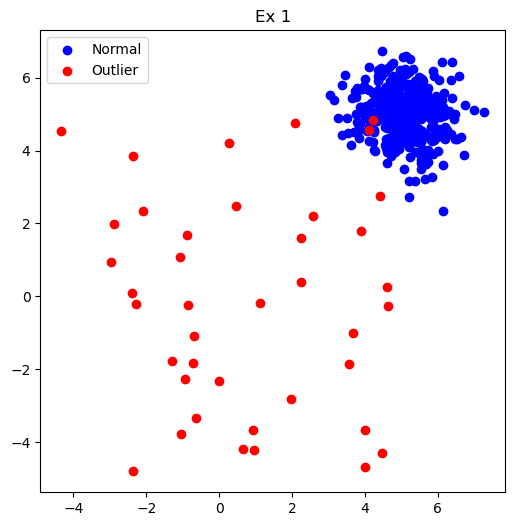

In [25]:
X_train, X_test, y_train, y_test = generate_data(
    n_train=400,         
    n_test=100,           
    n_features=2,        
    contamination=0.1,
    random_state=22
)

# Plot

plt.figure(figsize=(6, 6))
plt.scatter(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    c='blue',
    label='Normal'
)
plt.scatter(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    c='red',
    label='Outlier'
)

plt.title("Ex 1")
plt.legend()
plt.show()

# Ex 2

Train set
TN=358, FP=2, FN=2, TP=38
Balanced Accuracy: 0.9722
Confusion Matrix:
 [[358   2]
 [  2  38]]

Test set
TN=89, FP=1, FN=1, TP=9
Balanced Accuracy: 0.9444
Confusion Matrix:
 [[89  1]
 [ 1  9]]


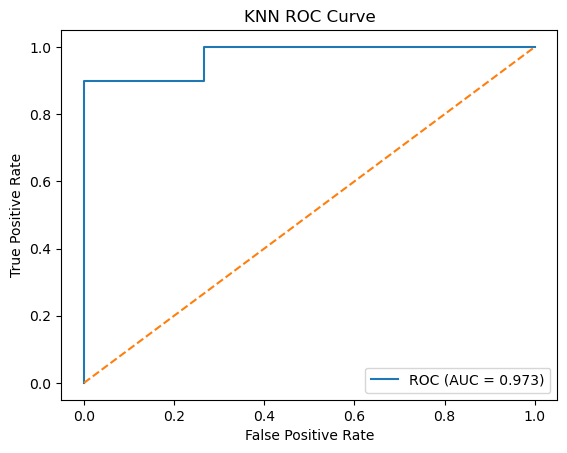

In [26]:
knn_model = KNN(contamination=0.1)
knn_model.fit(X_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)


def cm_stats(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    TN, FP, FN, TP = cm.ravel()
    bal_acc = balanced_accuracy_score(y_true, y_pred)
    return TN, FP, FN, TP, bal_acc, cm

TN, FP, FN, TP, bal_acc_train, cm_train = cm_stats(y_train, y_train_pred)
TNt, FPt, FNt, TPt, bal_acc_test, cm_test = cm_stats(y_test, y_test_pred)

print("Train set")
print(f"TN={TN}, FP={FP}, FN={FN}, TP={TP}")
print(f"Balanced Accuracy: {bal_acc_train:.4f}")
print("Confusion Matrix:\n", cm_train)

print("\nTest set")
print(f"TN={TNt}, FP={FPt}, FN={FNt}, TP={TPt}")
print(f"Balanced Accuracy: {bal_acc_test:.4f}")
print("Confusion Matrix:\n", cm_test)

y_test_scores = knn_model.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_test_scores, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC Curve")
plt.legend()
plt.show()


# Ex 3

# Ex 4